In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

In [27]:
""" One v.s. All binary classification """

' One v.s. All binary classification '

In [13]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [14]:
df.head()

,sp_song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,lda_topic_11,lda_topic_12,lda_topic_13,lda_topic_14,lda_topic_15,lda_topic_16,lda_topic_17,lda_topic_18,lda_topic_19,Playlists
0,6edQfeOlqbGteYixpJl3Sm,0.857,0.602,10,-8.311,1,0.0290,0.489000,0.02440,0.3170,...,0.0,0.022993,0.000000,0.122078,0.0,0.000000,0.000000,0.081108,0.386042,[165]
1,5Oe7wHPL4hdEXeF4AOayCi,0.322,0.990,8,-1.785,1,0.1710,0.000044,0.41700,0.0366,...,0.0,0.000000,0.163142,0.022999,0.0,0.144614,0.187207,0.000000,0.000000,[79]
2,6i1uWZYWabNHq2wQnoca58,0.666,0.884,9,-5.243,0,0.0429,0.506000,0.00612,0.0408,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.582131,[15]
3,4BzBtS6PBreni5hNPo2hos,0.609,0.578,9,-7.081,1,0.0414,0.296000,0.00000,0.1500,...,0.0,0.000000,0.511716,0.084905,0.0,0.000000,0.000000,0.115004,0.108140,[168]
4,0GvhHQbWSnGltjl0je61dI,0.699,0.514,4,-12.610,1,0.0315,0.587000,0.02900,0.2200,...,0.0,0.000000,0.000000,0.401954,0.0,0.000000,0.000000,0.000000,0.000000,"[30, 133]"


In [15]:
# playlists_multi = [132, 123,19,46,60,68,79,125]  #132, 123,19,46,60,68,79,125
playlists_multi = [i for i in range(1,169,1)]  #132, 123,19,46,60,68,79,125

dict_playlists_to_songs = {}
data = np.array(df)
Dataset = []
for j in playlists_multi:
    l0 = []
    for i in df.index:
        l = eval(df["Playlists"][i])
        if(j in l):
            l.remove(j)
            flag = 0
            for k in playlists_multi:
                    if(k!=j and k in l):
                        flag = 1
            if(flag!=1):
                l0.append(df["sp_song_id"][i])
                Dataset.append(data[i])
                
    dict_playlists_to_songs[j] = l0
#     print(len(l0))
print(len(dict_playlists_to_songs))
Dataset = np.array(Dataset)
print(Dataset.shape)
np.random.shuffle(Dataset)
print(Dataset[0])



168
(6124, 36)
['7GK2KVYH8FrTC9zehmjVMd' 0.7809999999999999 0.556 5 -13.067 0 0.0611
 0.0661 0.0907 0.0339 0.968 125.999 491933 2005 61 0.021749544888734814
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.03960105031728745 0.0 0.0
 0.8572894334793091 0.0 0.0 0.039667021483182914 0.02617534250020981 0.0
 0.0 0.0 0.0 '[8]']


In [16]:
X = Dataset[:,1:-1]
Y = Dataset[:,-1]
# print(Y)
for i in range(len(Y)):
    Y[i] = eval(Y[i])
    for j in playlists_multi:
        if(j in Y[i]):
            Y[i] = j
            break
    
print(X.shape)
print(Y.shape)



(6124, 34)
(6124,)


In [17]:
X = np.array(X)
y = np.array(Y)
y = Y.reshape(-1, 1)
standardScalar = StandardScaler()
X = standardScalar.fit_transform(X)
print(X.shape, y.shape)
y = np.squeeze(y)
# print(X)
# print(y)

(6124, 34) (6124, 1)


In [18]:
y = y.astype("str")
# print(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)
print(tsne_em)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4899 samples in 0.176s...
[t-SNE] Computed neighbors for 4899 samples in 6.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4899
[t-SNE] Computed conditional probabilities for sample 2000 / 4899
[t-SNE] Computed conditional probabilities for sample 3000 / 4899
[t-SNE] Computed conditional probabilities for sample 4000 / 4899
[t-SNE] Computed conditional probabilities for sample 4899 / 4899
[t-SNE] Mean sigma: 1.595784
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.738823
[t-SNE] KL divergence after 1000 iterations: 2.183609
[[-50.85699     26.63079   ]
 [ 17.026144    29.44964   ]
 [ 25.764456    13.844501  ]
 ...
 [ 35.51579    -53.195408  ]
 [ 16.758364    51.1307    ]
 [  0.90854007   4.7518897 ]]


In [22]:
df_tsne= pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne["x"] = tsne_em[:,0]
df_tsne["y"] = tsne_em[:,1]
df_tsne["label"] = y_train

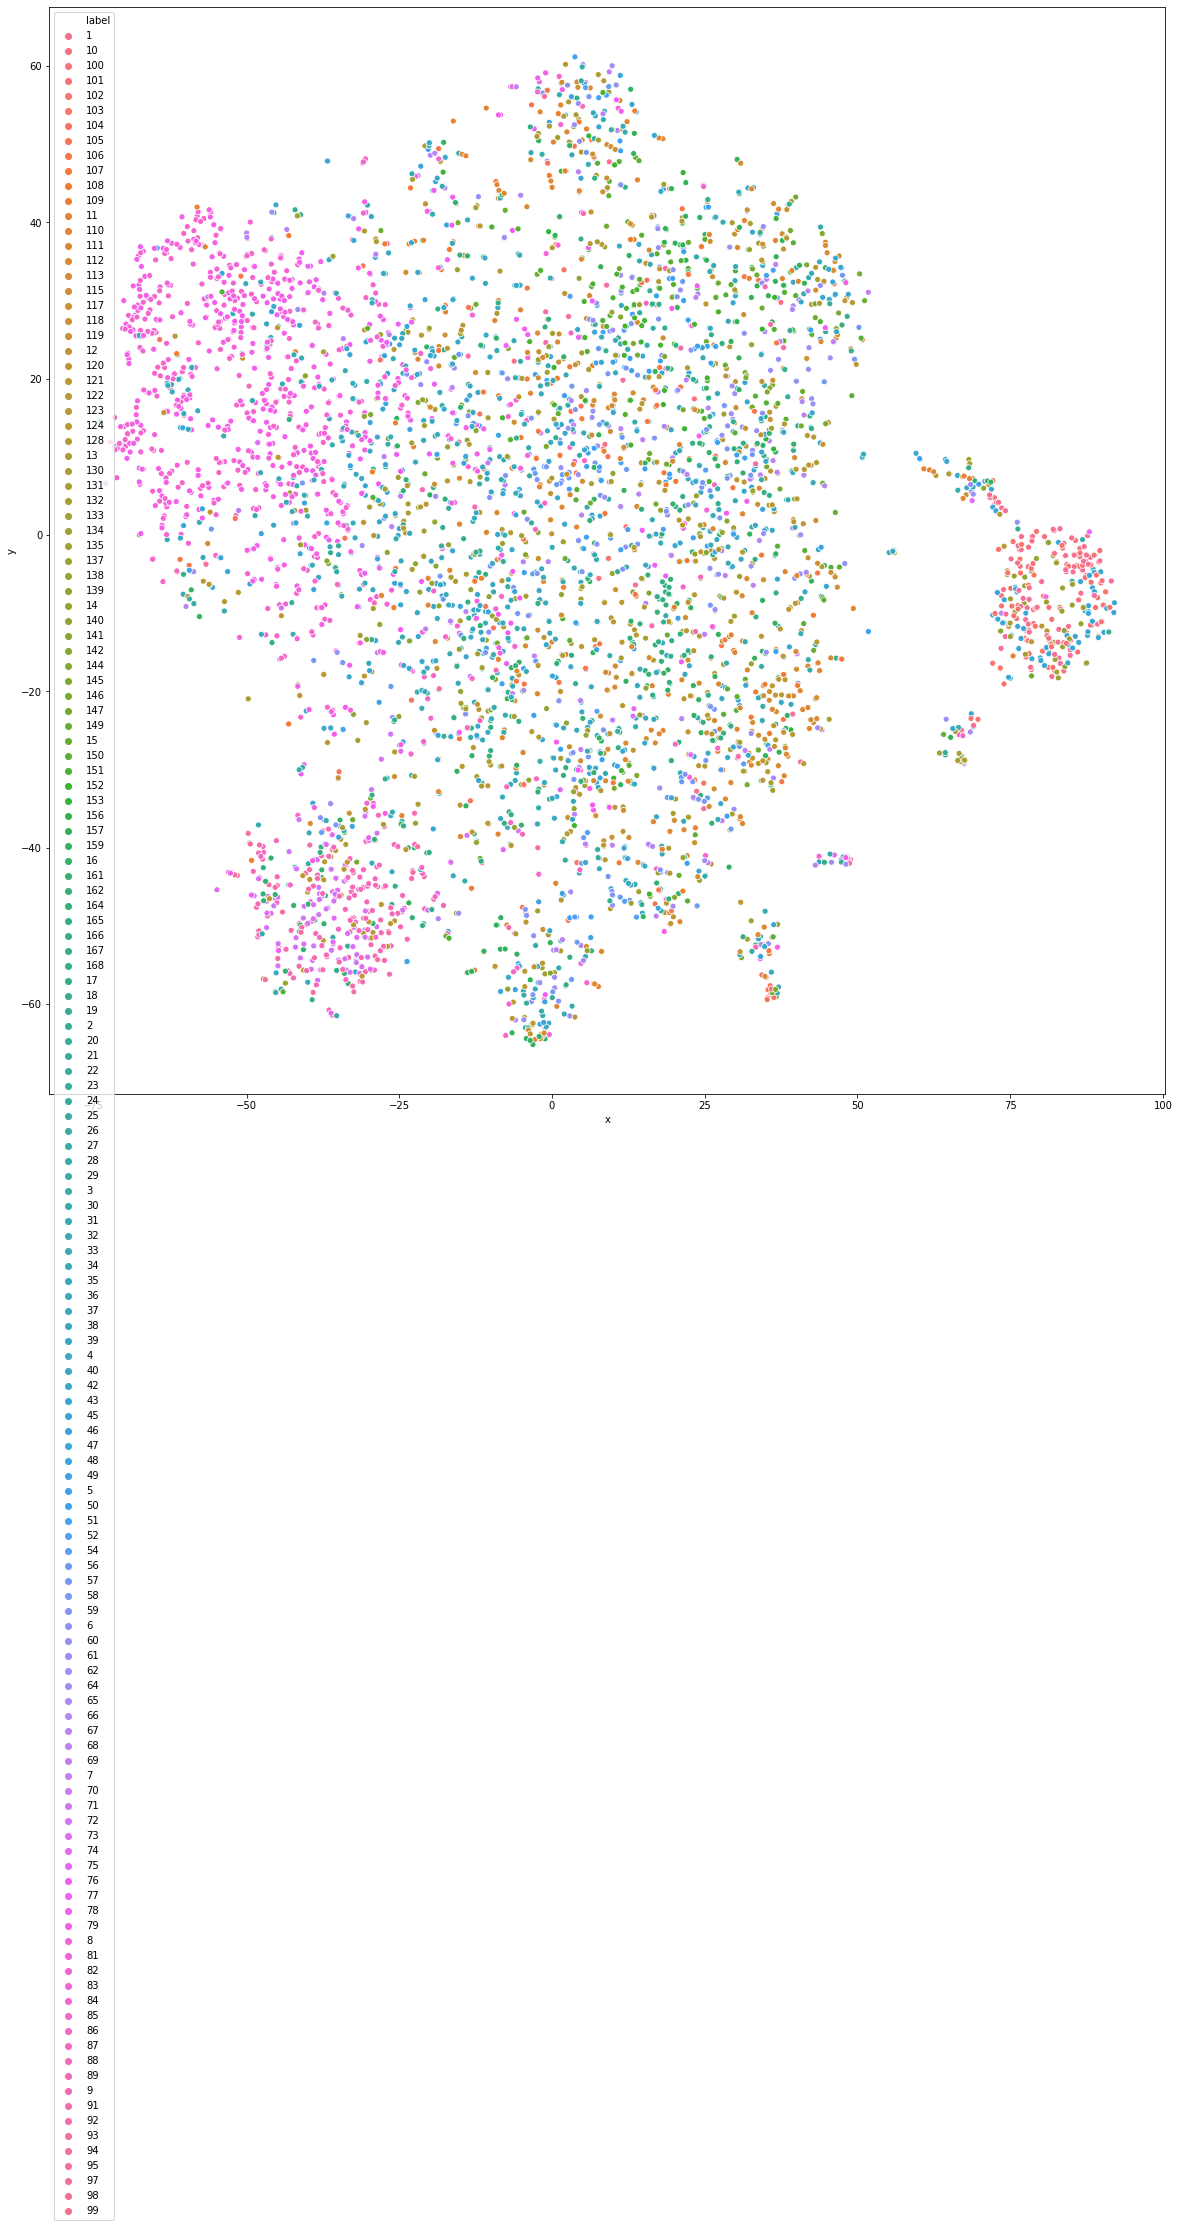

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,20))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne["x"], y = df_tsne["y"], hue = df_tsne["label"],  palette = sns.color_palette("husl", len(set(y_train))))
plt.show()

In [26]:

logistic = LogisticRegression(solver = "saga", multi_class = "multinomial")

logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)

y_pred = logistic.predict(X_test)
pres_score = precision_score(y_test, y_pred, average = "weighted")

f1= f1_score(y_test, y_pred, average = "weighted")
recall_Score = recall_score(y_test, y_pred, average = "weighted")
print(test_score, pres_score, f1, recall_Score)

0.24326530612244898 0.2118821287532741 0.2121091181833155 0.24326530612244898


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricW

In [28]:
""" One vs One Binary classification"""

' One vs One Binary classification'

In [29]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [30]:
df.head()

,sp_song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,lda_topic_11,lda_topic_12,lda_topic_13,lda_topic_14,lda_topic_15,lda_topic_16,lda_topic_17,lda_topic_18,lda_topic_19,Playlists
0,6edQfeOlqbGteYixpJl3Sm,0.857,0.602,10,-8.311,1,0.0290,0.489000,0.02440,0.3170,...,0.0,0.022993,0.000000,0.122078,0.0,0.000000,0.000000,0.081108,0.386042,[165]
1,5Oe7wHPL4hdEXeF4AOayCi,0.322,0.990,8,-1.785,1,0.1710,0.000044,0.41700,0.0366,...,0.0,0.000000,0.163142,0.022999,0.0,0.144614,0.187207,0.000000,0.000000,[79]
2,6i1uWZYWabNHq2wQnoca58,0.666,0.884,9,-5.243,0,0.0429,0.506000,0.00612,0.0408,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.582131,[15]
3,4BzBtS6PBreni5hNPo2hos,0.609,0.578,9,-7.081,1,0.0414,0.296000,0.00000,0.1500,...,0.0,0.000000,0.511716,0.084905,0.0,0.000000,0.000000,0.115004,0.108140,[168]
4,0GvhHQbWSnGltjl0je61dI,0.699,0.514,4,-12.610,1,0.0315,0.587000,0.02900,0.2200,...,0.0,0.000000,0.000000,0.401954,0.0,0.000000,0.000000,0.000000,0.000000,"[30, 133]"


In [ ]:
playlists = []

for playlist in playlists:
    